# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# from imdb import Cinemagoer

pd.set_option('display.max_columns', 500)

# Acquire data

In [2]:
data = pd.read_csv('data/imdb_top_1000.csv')

In [3]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
data.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


# Describe data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)
data['Runtime'] = data['Runtime'].str.replace(' min', '').astype(int)

In [7]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
data['Certificate'] = data['Certificate'].fillna('Unknown')
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())

# Data Visualization

## How is the proportion of Certificate?

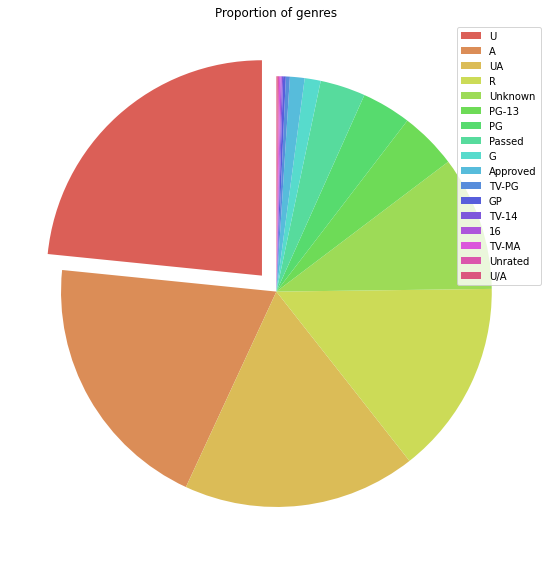

In [42]:
explode = np.zeros(len(data['Certificate'].value_counts()))
explode[0] = 0.1

plt.figure(figsize=(12,8))

plt.pie(data['Certificate'].value_counts(), 
        startangle = 90,
        explode=explode,
        colors=sns.color_palette("hls", len(explode))
)
plt.legend(list(data['Certificate'].value_counts().index), loc='upper right')
plt.title('Proportion of genres')
plt.tight_layout()
plt.show()

## How is the runtime along the movies?

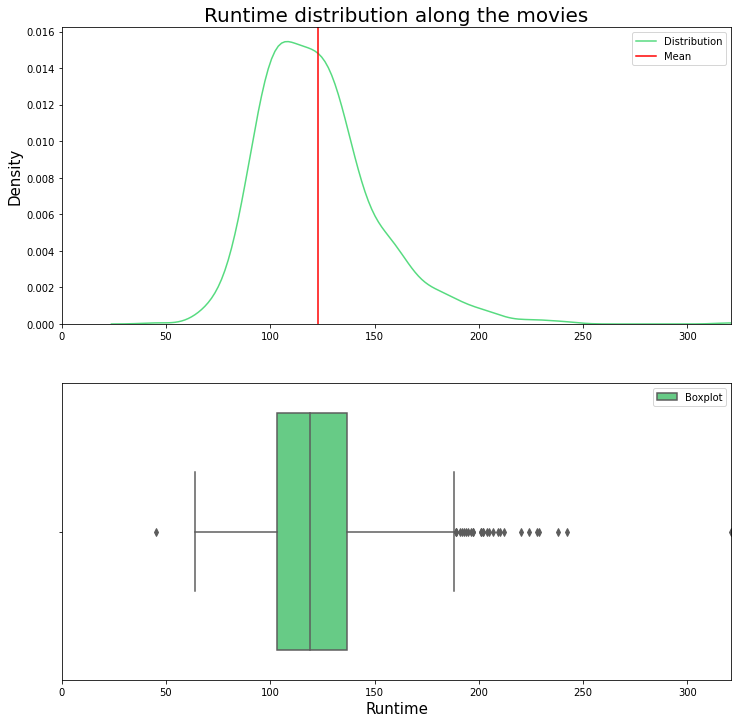

<Figure size 1440x216 with 0 Axes>

In [18]:
fig, axes = plt.subplots(2, figsize=(12, 12));
color=sns.color_palette("hls", 8)[3]

plt.figure(figsize=(20,3))

sns.kdeplot(x="Runtime", data=data, color=color, ax=axes[0], label='Distribution');
axes[0].tick_params(labelsize=10)
axes[0].set_title('Runtime distribution along the movies', fontsize=20)
# axes[0].set_xlabel('Gross', fontsize=15)
axes[0].set_xlabel('', fontsize=15)
axes[0].set_ylabel('Density', fontsize=15)
axes[0].set_xlim(0, data['Runtime'].max())
axes[0].axvline(data['Runtime'].mean(), color='red', label='Mean')
axes[0].legend()

sns.boxplot(x="Runtime", data=data, color=color, ax=axes[1]);
axes[1].tick_params(labelsize=10)
# axes[1].set_title('Gross division along the movies', fontsize=20)
axes[1].set_xlabel('Runtime', fontsize=15)
axes[1].set_xlim(0, data['Runtime'].max())
axes[1].legend(['Boxplot'])
plt.tight_layout();
plt.show();

## Which directors are more commons?

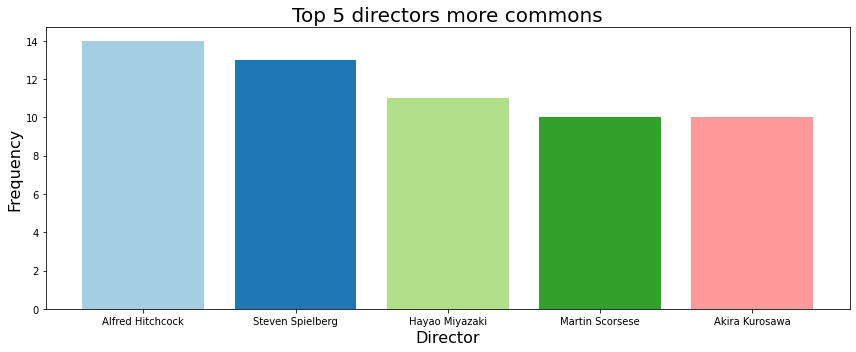

In [9]:
x = 'Director'
limit = 5
colors = sns.color_palette("Paired", limit)

fig, ax = plt.subplots(1, figsize=(12, 5))

ax.bar( 
    x=data[x].value_counts().index[:limit],
    height=data[x].value_counts()[:limit],
    color=colors
)
# ax.set_ylim(0, )
ax.set_title("Top {0} directors more commons".format(limit), fontsize=20)
ax.set_xlabel('{0}'.format(x), fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show();

## How is gross along the movies?

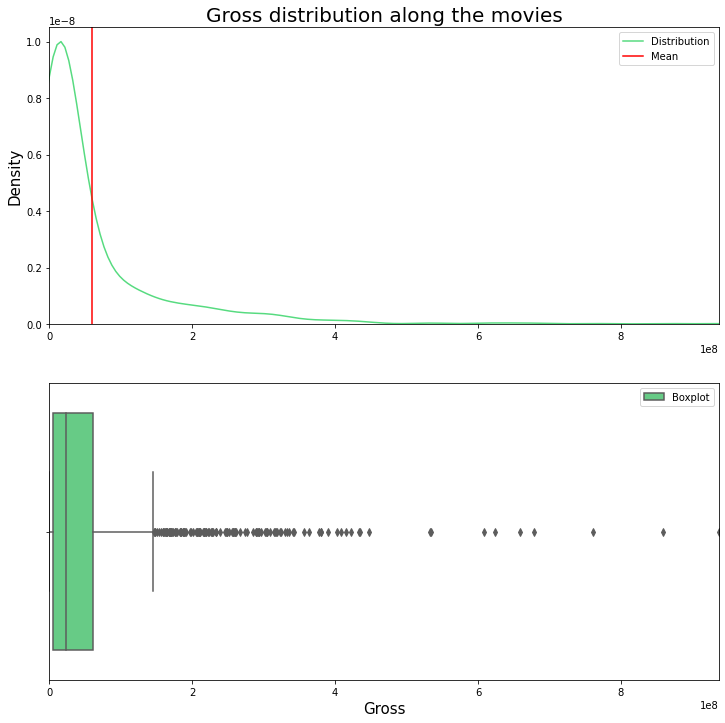

<Figure size 1440x216 with 0 Axes>

In [14]:
fig, axes = plt.subplots(2, figsize=(12, 12))
color=sns.color_palette("hls", 8)[3]

plt.figure(figsize=(20,3))

sns.kdeplot(x="Gross", data=data, color=color, ax=axes[0], label='Distribution')
axes[0].tick_params(labelsize=10)
axes[0].set_title('Gross distribution along the movies', fontsize=20)
# axes[0].set_xlabel('Gross', fontsize=15)
axes[0].set_xlabel('', fontsize=15)
axes[0].set_ylabel('Density', fontsize=15)
axes[0].set_xlim(0, data['Gross'].max())
axes[0].axvline(data['Gross'].mean(), color='red', label='Mean')
axes[0].legend()

sns.boxplot(x="Gross", data=data, color=color, ax=axes[1])
axes[1].tick_params(labelsize=10)
# axes[1].set_title('Gross division along the movies', fontsize=20)
axes[1].set_xlabel('Gross', fontsize=15)
axes[1].set_xlim(0, data['Gross'].max())
axes[1].legend(['Boxplot'])
plt.tight_layout()
plt.show();

## Which stars are more common?

In [11]:
def multiple_frequency_barplot(ax, data, x, colors, limit):
    ax.bar( 
        x=data[x].value_counts().index[:limit],
        height=data[x].value_counts()[:limit],
        color=colors
    )
    ax.set_ylim(0, 15)
    ax.set_xlabel('{0}'.format(x), fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)

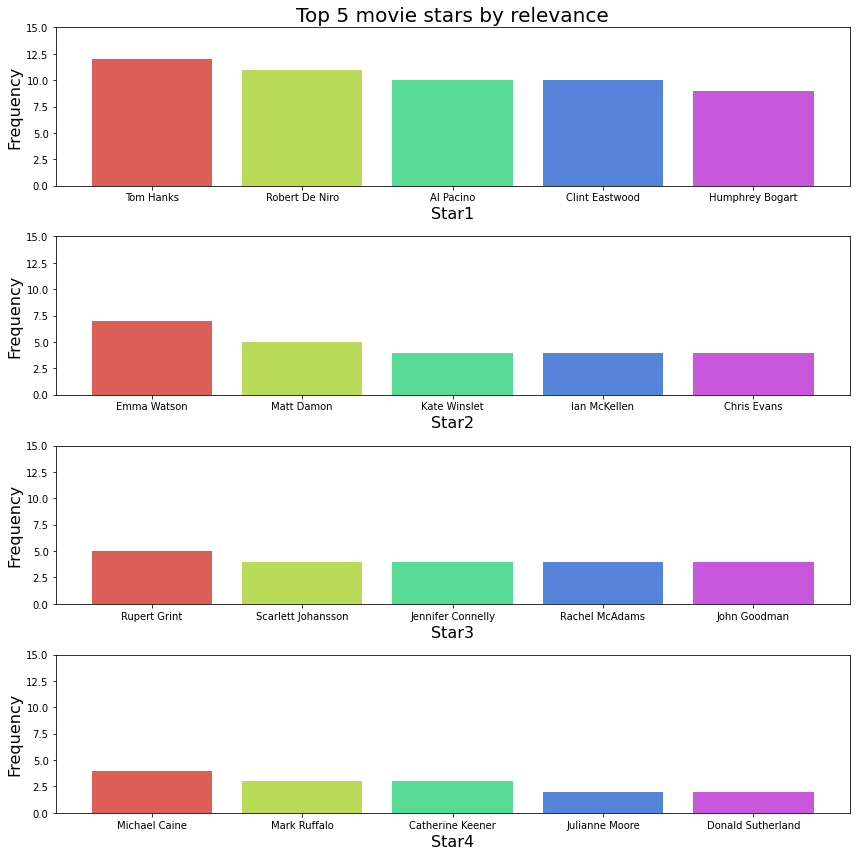

In [12]:
fig, axes = plt.subplots(4, 1, figsize=(12, 12))

# colors = sns.color_palette("rocket")[:5]
colors = sns.color_palette("hls", 5)
x_list = ['Star1', 'Star2', 'Star3', 'Star4']
limit = 5

for ax, x in zip(axes, x_list):
    multiple_frequency_barplot(ax, data, x, colors, limit)

axes[0].set_title("Top {0} movie stars by relevance".format(limit), fontsize=20)
plt.tight_layout()
plt.show();

## How is the proportion of genres?

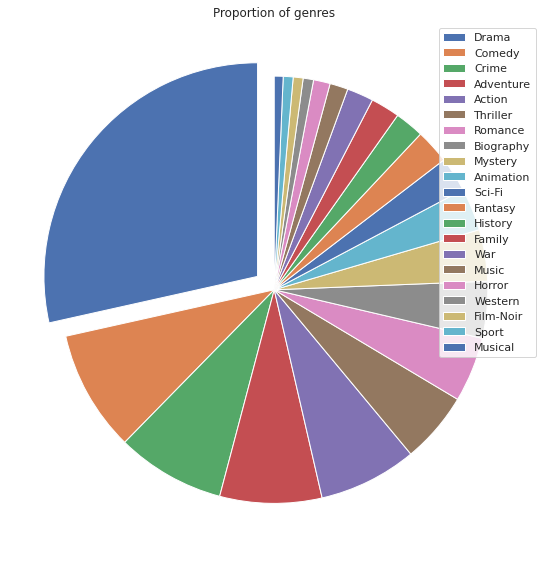

In [133]:
data_genre = []

for genres in data['Genre']:
    for genre in genres.split(','):
        data_genre.append(genre.strip())

data_genre = pd.Series(data_genre)
explode = np.zeros(len(data_genre.value_counts()))
explode[0] = 0.1

plt.figure(figsize=(12,8))

plt.pie(data_genre.value_counts(), 
        startangle = 90,
        explode=explode
)
plt.legend(list(data_genre.value_counts().index), loc='upper right')
plt.title('Proportion of genres')
plt.tight_layout()
plt.show()


## Which titles have most votes?

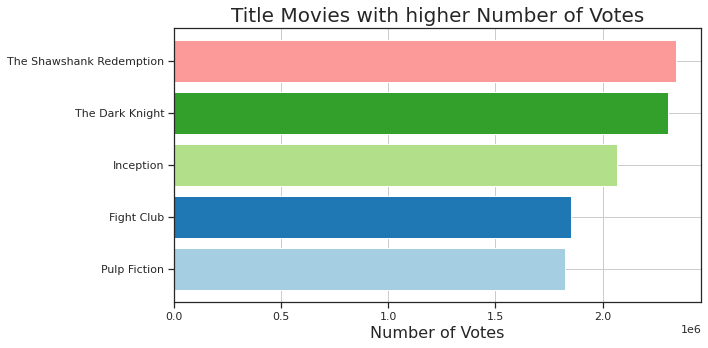

In [118]:
fig, ax = plt.subplots(1, figsize=(10, 5))
y='No_of_Votes'
limit = 5
data_aux = data[['Series_Title', y]].sort_values(y, ascending=False)[:limit].reset_index(drop=True)[::-1]

ax.barh(
    width=data_aux[y],
    y=data_aux['Series_Title'],
    color=sns.color_palette("Paired", limit)
)

# ax.tick_params(labelsize=10)
ax.grid()
ax.set_title('Title Movies with higher Number of Votes', fontsize=20)
ax.set_xlabel('Number of Votes', fontsize=16)
ax.set_ylabel('', fontsize=15)

plt.tight_layout()
plt.show();

# data.sort_values('No_of_Votes', ascending=False)[['Series_Title', 'No_of_Votes']][:5].reset_index(drop=True).style

## Which titles have a higher rating?

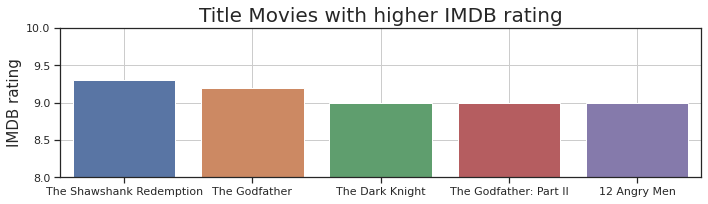

In [32]:
plt.figure(figsize=(10,3))

sns.set(style="ticks")
ax = sns.barplot(
    x="Series_Title", 
    y="IMDB_Rating", 
    data=data.sort_values('IMDB_Rating', ascending=False)[:5]
)

# ax.tick_params(labelsize=15)
ax.set_ylim(8, 10)
ax.grid()
ax.set_title('Title Movies with higher IMDB rating', fontsize=20)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel('IMDB rating', fontsize=15)

# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Which titles have a higher meta score?

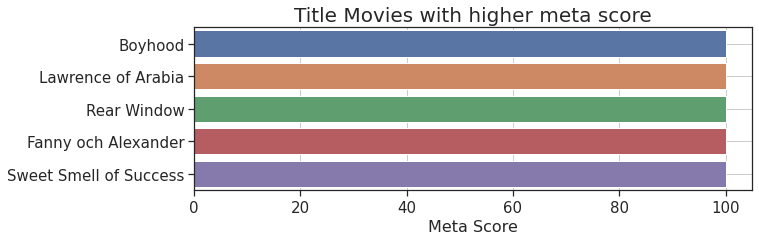

In [21]:
plt.figure(figsize=(10,3))

sns.set(style="ticks")
ax = sns.barplot(
    x="Meta_score", 
    y="Series_Title", 
    data=data.sort_values('Meta_score', ascending=False)[:5]
)

ax.tick_params(labelsize=15)
ax.grid()
ax.set_title('Title Movies with higher meta score', fontsize=20)
ax.set_xlabel('Meta Score', fontsize=16)
ax.set_ylabel('', fontsize=15)

# plt.xticks(rotation=90)
plt.show()

## How many movies was released by year?

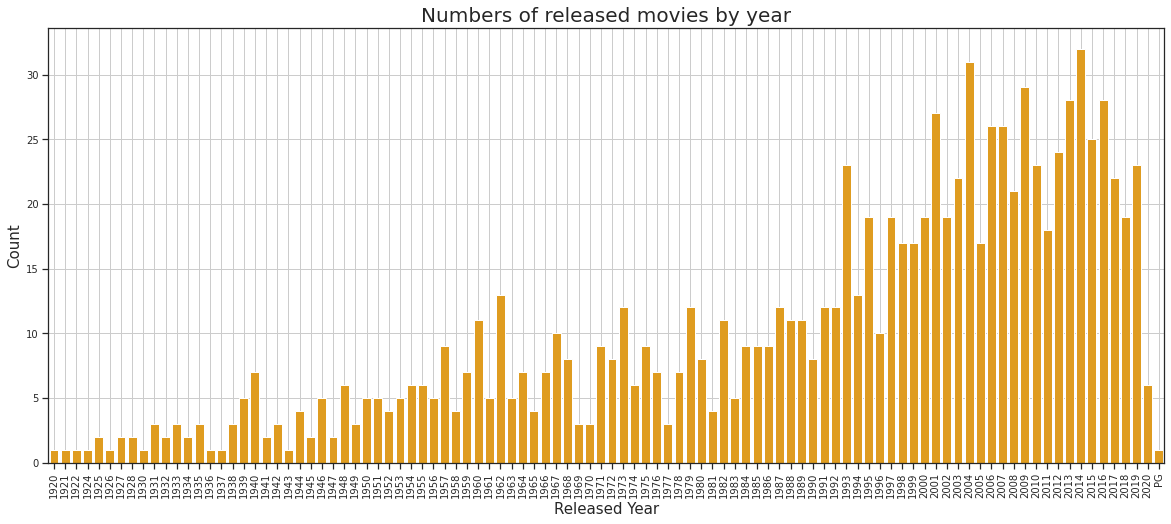

In [121]:
plt.figure(figsize=(20,8))

sns.set(style="ticks")
ax = sns.countplot(x="Released_Year", data=data.sort_values('Released_Year'), color="orange")
ax.tick_params(labelsize=10)
ax.grid()
ax.set_title('Numbers of released movies by year', fontsize=20)
ax.set_xlabel('Released Year', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [44]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Which genres have a higher rating and  meta score?

In [141]:
data_genre = []

for genres in data['Genre']:
    for genre in genres.split(','):
        data_genre.append(genre.strip())

unique_genres = pd.Series(data_genre).unique()

In [180]:
dic_genres = {}

for genre in unique_genres:
    dic_genres[genre] = []
    IMDB_Rating = []
    Meta_score = []
    No_of_Votes = []
    
    for idx in data.index:    

        if genre in data.iloc[idx]['Genre']:
            IMDB_Rating.append(data.iloc[idx]['IMDB_Rating'])
            Meta_score.append(data.iloc[idx]['Meta_score'])
            No_of_Votes.append(data.iloc[idx]['No_of_Votes'])
        
    mean_IMDB_Rating = round(np.mean(IMDB_Rating), 2)
    mean_Meta_score = round(np.mean(Meta_score), 2)
    mean_No_of_Votes = round(np.mean(No_of_Votes), 2)

    
    dic_genres[genre] = [mean_IMDB_Rating, mean_Meta_score, mean_No_of_Votes]

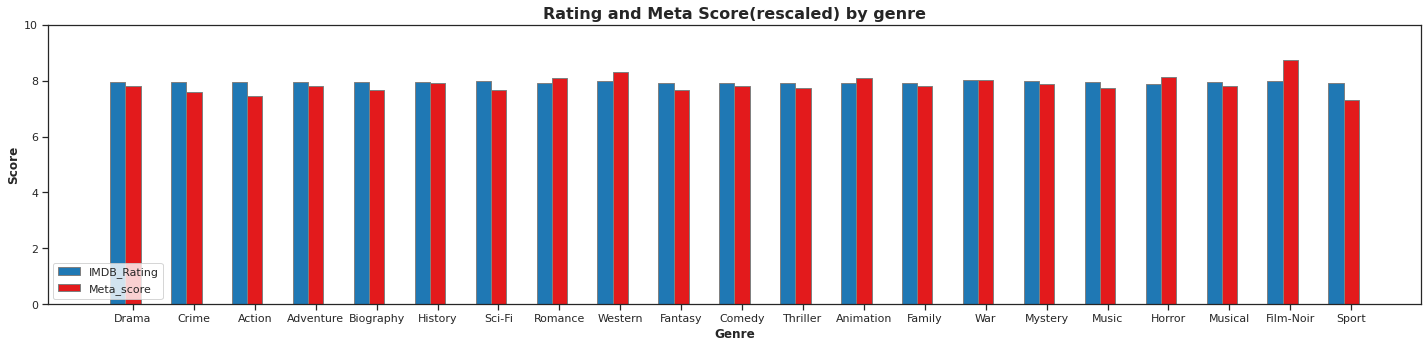

In [191]:
barWidth = 0.25
fig = plt.subplots(figsize =(20, 5))

df_genres = pd.DataFrame(dic_genres)
df_genres.iloc[1] = df_genres.iloc[1]/10

br1 = np.arange(len(df_genres.iloc[0]))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, df_genres.iloc[0], color =sns.color_palette("Paired")[1], width = barWidth,
        edgecolor ='grey', label ='IMDB_Rating')
plt.bar(br2, df_genres.iloc[1], color =sns.color_palette("Paired")[5], width = barWidth,
        edgecolor ='grey', label ='Meta_score')

plt.title('Rating and Meta Score(rescaled) by genre', fontweight ='bold', fontsize=16)
plt.xlabel('Genre', fontweight ='bold', fontsize = 12)
plt.ylabel('Score', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(dic_genres))],
           list(unique_genres))
# plt.tick_params(labelsize=12)
plt.ylim(0, 10)
plt.tight_layout()
plt.legend(loc=3)
plt.show()

### Which genres have a higher rating?

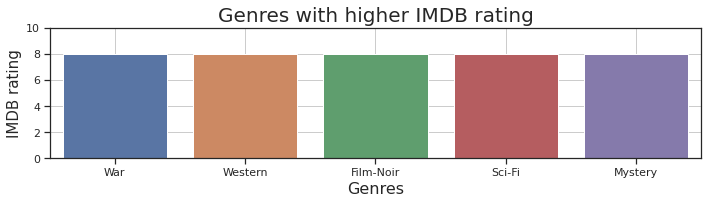

In [182]:
df_genres = pd.DataFrame(dic_genres)
limit = 5
data_aux = df_genres.iloc[0].T.sort_values(ascending=False)[:limit].reset_index()
data_aux.columns = ['genres', 'IMDB_Rating']

plt.figure(figsize=(10,3))

sns.set(style="ticks")
ax = sns.barplot(
    x="genres", 
    y="IMDB_Rating", 
    data=data_aux
)

# ax.tick_params(labelsize=15)
ax.set_ylim(0, 10)
ax.grid()
ax.set_title('Genres with higher IMDB rating', fontsize=20)
ax.set_xlabel('Genres', fontsize=16)
ax.set_ylabel('IMDB rating', fontsize=15)

# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Which genres have a higher Meta Score?

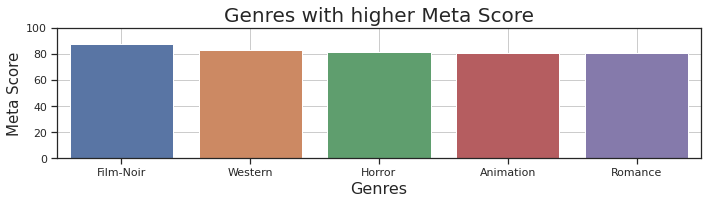

In [183]:
df_genres = pd.DataFrame(dic_genres)
limit = 5
data_aux = df_genres.iloc[1].T.sort_values(ascending=False)[:limit].reset_index()
data_aux.columns = ['genres', 'Meta_score']

plt.figure(figsize=(10,3))

sns.set(style="ticks")
ax = sns.barplot(
    x="genres", 
    y="Meta_score", 
    data=data_aux
)

# ax.tick_params(labelsize=15)
ax.set_ylim(0, 100)
ax.grid()
ax.set_title('Genres with higher Meta Score', fontsize=20)
ax.set_xlabel('Genres', fontsize=16)
ax.set_ylabel('Meta Score', fontsize=15)

# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Which genres have most votes?

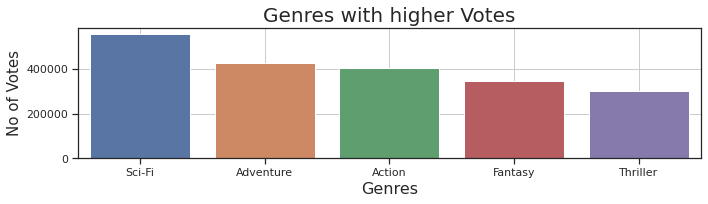

In [187]:
df_genres = pd.DataFrame(dic_genres)
limit = 5
data_aux = df_genres.iloc[2].T.sort_values(ascending=False)[:limit].reset_index()
data_aux.columns = ['genres', 'No_of_Votes']

plt.figure(figsize=(10,3))

sns.set(style="ticks")
ax = sns.barplot(
    x="genres", 
    y="No_of_Votes", 
    data=data_aux
)

# ax.tick_params(labelsize=15)
# ax.set_ylim(0, 100)
ax.grid()
ax.set_title('Genres with higher Votes', fontsize=20)
ax.set_xlabel('Genres', fontsize=16)
ax.set_ylabel('No of Votes', fontsize=15)

# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Which genres are more offen by category?

## Which genres have higher runtime?

## Which category have a higher runtime?

## Which genre have more gross?

## Which category have more gross?

## Which directores have more gross?

## Which directores have more runtime?

# Falta categorizar o certificate